# Dataset testing

### 1. Train / Test Split (inherent to json dataset)

In [3]:
import json
from collections import Counter

label_file = "large_rock_dataset.json"

with open(label_file, 'r') as f:
    data = json.load(f)

splits = [tile.get('split', 'train') for tile in data['dataset']]  # Default to 'train' if missing
split_counts = Counter(splits)

for split, count in split_counts.items():
    print(f"{split.capitalize()}: {count} images")
    print(f"Percentage: {count / len(splits) * 100:.2f}%")

Train: 640 images
Percentage: 64.52%
Test: 352 images
Percentage: 35.48%


64 % is a bit low but if we use 10% of images from test split for validation and perform augmentation on training images could be enough --> to be monitored

### 2. Visualisation of YOLO - using Dataset.py
Following cell can be updated depending on which dataset we are using

In [4]:
from Dataset import LargeRocksDataset
from utils import *
image_folder = "swissImage_50cm_patches"  # Path to swissImage_50cm_patches or equivalent
label_file = "large_rock_dataset.json"  # JSON file with annotations
output_path = "YOLO"  # Directory to save processed dataset

rocks_dataset = LargeRocksDataset(image_folder, label_file, output_path)
rocks_dataset.process_dataset()

Dataset (swissImage_50cm_patches) converted to YOLO format with train/val/test splits at YOLO


Visualisation: comparison of newly annotaded YOLO data with original data

In [5]:
import random

# Paths to the YOLO dataset
image_folder = "YOLO/images/train"
label_folder = "YOLO/labels/train"
json_file_path = 'large_rock_dataset.json'

# Load the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

train_data = [tile for tile in data['dataset'] if tile.get('split') == 'train']



rerun following cell for more images:

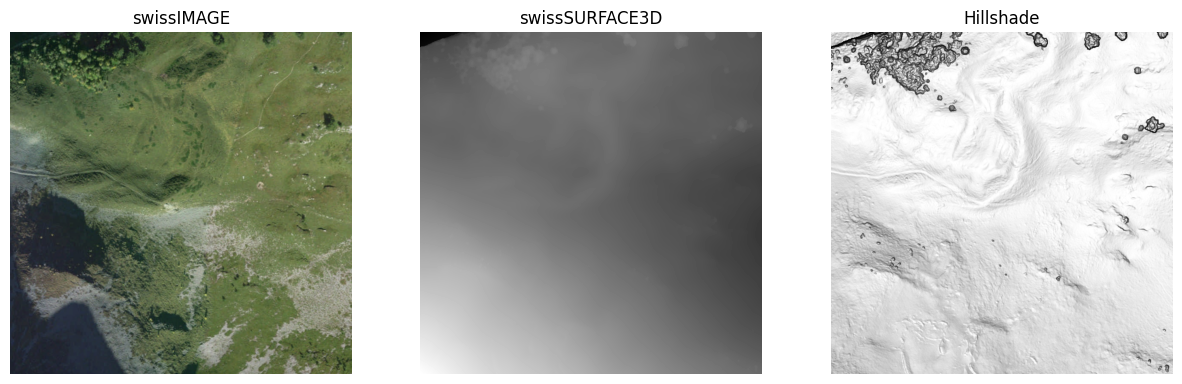

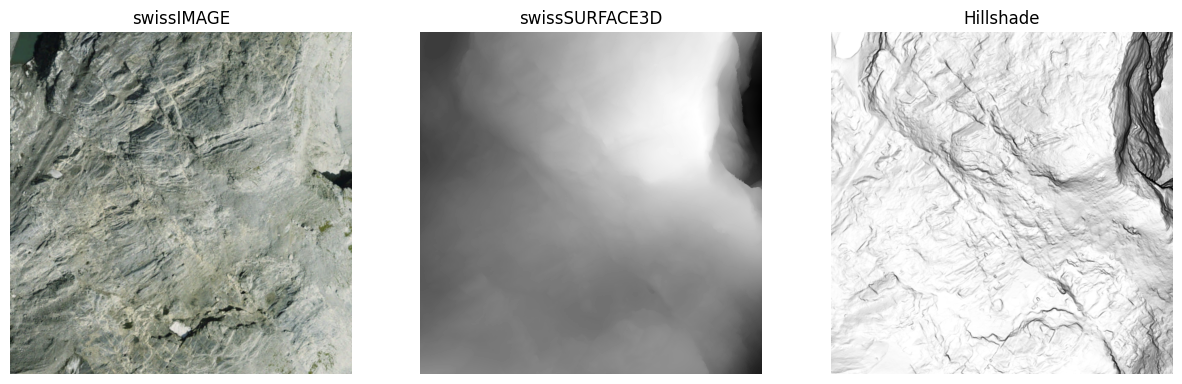

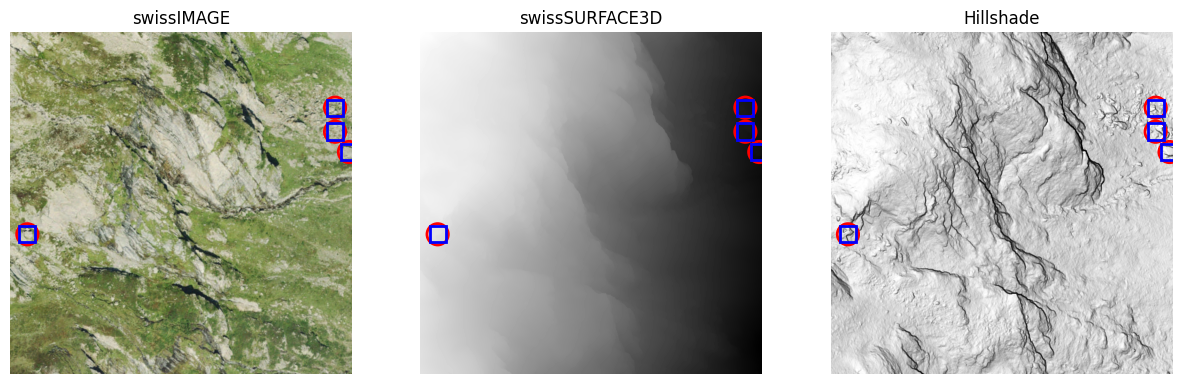

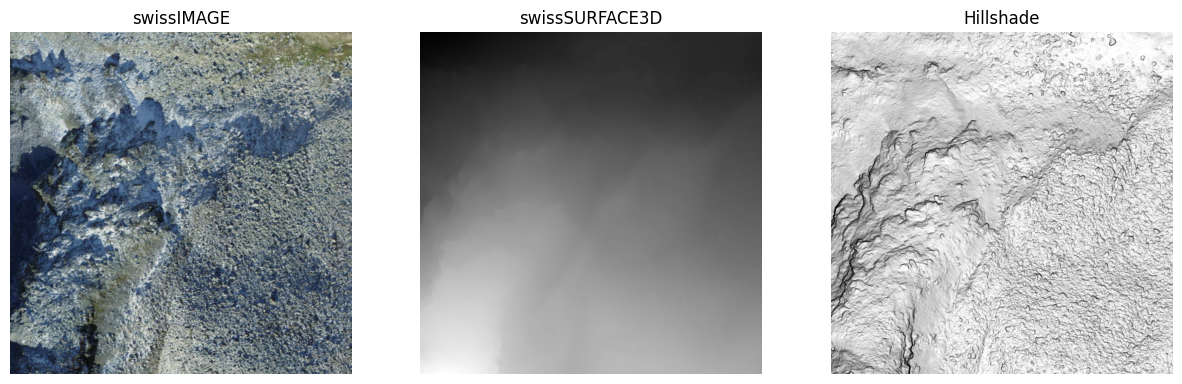

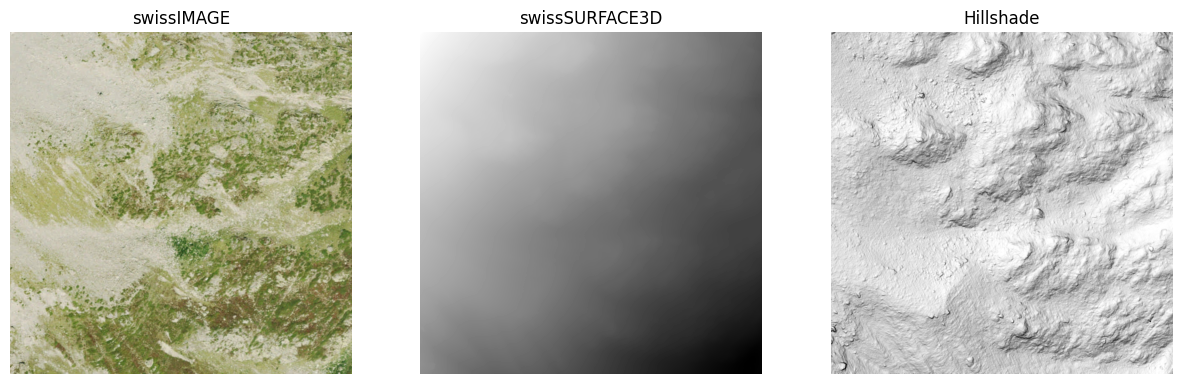

In [6]:
for k in range(5):  # Visualize 5 random samples
    random.shuffle(train_data)
    plot_images_with_comparison(train_data[k], label_folder="YOLO/labels/train")

Initial analysis shows that bbox size is never in the large_rock_dataset unlike what is written in Usefull_tips.ipynb, so the code defaults to the size I gave it. [10,10] was too small so I pushed it up to [30,30] to have a similar radius to the one provided